# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup posts on a variety of topics. You'll train classifiers to distinguish posts by topics inferred from the text. Whereas with digit classification, where each input is relatively dense (represented as a 28x28 matrix of pixels, many of which are non-zero), here each document is relatively sparse (represented as a bag-of-words). Only a few words of the total vocabulary are active in any given document. The assumption is that a label depends only on the count of words, not their order.

The `sklearn` documentation on feature extraction may be useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on Slack, but <b> please prepare your own write-up with your own code. </b>

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import nltk

Load the data, stripping out metadata so that only textual features will be used, and restricting documents to 4 specific topics. By default, newsgroups data is split into training and test sets, but here the test set gets further split into development and test sets.  (If you remove the categories argument from the fetch function calls, you'd get documents from all 20 topics.)

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test  = fetch_20newsgroups(subset='test',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)

num_test = int(len(newsgroups_test.target) / 2)
test_data, test_labels   = newsgroups_test.data[num_test:], newsgroups_test.target[num_test:]
dev_data, dev_labels     = newsgroups_test.data[:num_test], newsgroups_test.target[:num_test]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('dev label shape:',      dev_labels.shape)
print('test label shape:',     test_labels.shape)
print('labels names:',         newsgroups_train.target_names)

training label shape: (2034,)
dev label shape: (676,)
test label shape: (677,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


### Part 1:

For each of the first 5 training examples, print the text of the message along with the label.

In [3]:
# Modded the function parameters to incorporate various datasets and labels.
def P1(num_examples, dataset, labels):
    for a in range(num_examples):
        print("Topic Label:", labels[a])
        print ("")
        print("Training Example:")
        print("")
        print(dataset[a])
        print("----------------------------------------------------------------------")
    return

In [4]:
P1(5, train_data, train_labels)

Topic Label: 1

Training Example:

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
----------------------------------------------------------------------
Topic Label: 3

Training Example:



Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fru

### Part 2:

Transform the training data into a matrix of **word** unigram feature vectors.  What is the size of the vocabulary? What is the average number of non-zero features per example?  What is the fraction of the non-zero entries in the matrix?  What are the 0th and last feature strings (in alphabetical order)?<br/>
_Use `CountVectorization` and its `.fit_transform` method.  Use `.nnz` and `.shape` attributes, and `.get_feature_names` method._

Now transform the training data into a matrix of **word** unigram feature vectors using your own vocabulary with these 4 words: ["atheism", "graphics", "space", "religion"].  Confirm the size of the vocabulary. What is the average number of non-zero features per example?<br/>
_Use `CountVectorization(vocabulary=...)` and its `.transform` method._

Now transform the training data into a matrix of **character** bigram and trigram feature vectors.  What is the size of the vocabulary?<br/>
_Use `CountVectorization(analyzer=..., ngram_range=...)` and its `.fit_transform` method._

Now transform the training data into a matrix of **word** unigram feature vectors and prune words that appear in fewer than 10 documents.  What is the size of the vocabulary?<br/>
_Use `CountVectorization(min_df=...)` and its `.fit_transform` method._

Now again transform the training data into a matrix of **word** unigram feature vectors. What is the fraction of words in the development vocabulary that is missing from the training vocabulary?<br/>
_Hint: Build vocabularies for both train and dev and look at the size of the difference._

Notes:
* `.fit_transform` makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").
* `.fit_transform` and `.transform` return sparse matrix objects.  See about them at http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html.  

In [5]:
# I decided rather than just return the first and last features from the bag of words to actually return the list
# of words (features) that were associated with each training sample. 

# Return alphabetized feature string for any vector and any index:
def return_string(position, index_list, bow):
    output_list = []
    rows, cols = index_list[position].nonzero()
    for index in cols:
        output_list.append(bow[index])
    print(sorted(output_list))
    return

In [75]:
# First part:
def P2_1(dataset):
    vec = CountVectorizer(input = 'content', binary = False, ngram_range = (1,1))
    vec_fit = vec.fit_transform(dataset)
    examples, words = vec_fit.shape
    print("The size of the vocabulary is:", words)
    print("The average number of non-zero features per example is:", round(vec_fit.nnz/examples, 2))
    print("The fraction of non-zero entries in the matrix is:", round(vec_fit.nnz/(examples*words), 5))
    print("The first feature string is: {}".format(vec.get_feature_names()[0]))
    print("The last feature string is: {}".format(vec.get_feature_names()[-1]))
    return 

# Second part:
def P2_2(dataset, vocab):
    vec = CountVectorizer(input = 'content', vocabulary = vocab, binary = False, ngram_range = (1,1))
    vec_fit = vec.fit_transform(dataset)
    examples, words = vec_fit.shape
    print("The size of the vocabulary is:", words)
    print("The average number of non-zero features per example is:", round(vec_fit.nnz/examples, 2))
    return
    
# Third part:
def P2_3(dataset):
    vec = CountVectorizer(input = 'content', analyzer='char', binary = False, ngram_range = (2,3))
    vec_fit = vec.fit_transform(dataset)
    examples, words = vec_fit.shape
    print("The size of the vocabulary is:", words)
    print("The average number of non-zero features per example is:", round(vec_fit.nnz/examples, 2))
    return

# Fourth part:
def P2_4(dataset):
    vec = CountVectorizer(input = 'content', min_df=10, binary = False, ngram_range = (1,1))
    vec_fit = vec.fit_transform(dataset)
    examples, words = vec_fit.shape
    print("The size of the vocabulary is:", words)
    print("The average number of non-zero features per example is:", round(vec_fit.nnz/examples, 2))
    return

# Fifth part:
def P2_5(train_dataset, test_dataset):
    vec1 = CountVectorizer(input = 'content', binary = False, ngram_range = (1,1))
    vec_train_fit = vec1.fit_transform(train_dataset)
    vec2 = CountVectorizer(input = 'content', binary = False, ngram_range = (1,1))
    vec_test_fit = vec2.fit_transform(test_dataset)
    examples1, words1 = vec_train_fit.shape
    examples2, words2 = vec_test_fit.shape
    # Find the number of words that are missing from the dev dataset
    a = set(vec1.get_feature_names())
    b = set(vec2.get_feature_names())

    # Print results
    print("The size of the training vocabulary is: {}".format(words1))
    print("The size of the development vocabulary is: {}".format(words2))
    print("The fraction of missing words: {}".format(round((len(b-a)/len(b)), 2)))
    
    return 

In [7]:
P2_1(train_data)

The size of the vocabulary is: 26879
The average number of non-zero features per example is: 96.71
The fraction of non-zero entries in the matrix is: 0.0036
The first feature string is: 00
The last feature string is: zyxel


In [8]:
P2_2(train_data, ["atheism", "graphics", "space", "religion"])

The size of the vocabulary is: 4
The average number of non-zero features per example is: 0.27


In [9]:
P2_3(train_data)

The size of the vocabulary is: 35478
The average number of non-zero features per example is: 684.19


In [34]:
P2_4(train_data)

The size of the vocabulary is: 3064
The average number of non-zero features per example is: 72.68


In [76]:
P2_5(train_data, dev_data)

The size of the training vocabulary is: 26879
The size of the development vocabulary is: 16246
The fraction of missing words: 0.25


### Part 3:

Transform the training and development data to matrices of word unigram feature vectors.

1. Produce several k-Nearest Neigbors models by varying k, including one with k set to optimize f1 score.  For each model, show the k value and f1 score.
1. Produce several Naive Bayes models by varying smoothing (alpha), including one with alpha set approximately to optimize f1 score.  For each model, show the alpha value and f1 score.
1. Produce several Logistic Regression models by varying L2 regularization strength (C), including one with C set approximately to optimize f1 score.  For each model, show the C value, f1 score, and sum of squared weights for each topic.

* Why doesn't k-Nearest Neighbors work well for this problem?
* Why doesn't Logistic Regression work as well as Naive Bayes does?
* What is the relationship between logistic regression's sum of squared weights vs. C value?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `CountVectorizer` and its `.fit_transform` and `.transform` methods to transform data.
* You can use `KNeighborsClassifier(...)` to produce a k-Nearest Neighbors model.
* You can use `MultinomialNB(...)` to produce a Naive Bayes model.
* You can use `LogisticRegression(C=..., solver="liblinear", multi_class="auto")` to produce a Logistic Regression model.
* You can use `LogisticRegression`'s `.coef_` method to get weights for each topic.
* You can use `metrics.f1_score(..., average="weighted")` to compute f1 score.

In [77]:
def P3_1(k_value, training_data, training_labels, testing_data, testing_labels):
    
    # Transform raw datasets into matrices
    vec = CountVectorizer(input = 'content', binary = False, ngram_range = (1,1))
    vec_fit_train = vec.fit_transform(training_data)
    vec_fit_test = vec.transform(testing_data)
    
    # Fit KNN model 
    master_dic = {}
    for value in k_value:
        mod_knn = KNeighborsClassifier(n_neighbors = value)
        mod_knn_fit = mod_knn.fit(vec_fit_train, training_labels)
        mod_knn_pred = mod_knn.predict(vec_fit_test)
        mod_knn_report = classification_report(testing_labels, mod_knn_pred, output_dict = True)
        master_dic[value] = mod_knn_report['macro avg']['f1-score']
        print("For {}-nearest neighbors, the F-1 score is: {}".format(value, round(mod_knn_report['macro avg']['f1-score'], 3)))
        
    # Plot a graph to look at F1 scores for various K's
    fig, ax1 = plt.subplots(figsize=(7,4))   
    color = 'tab:red'
    ax1.set_title("Average F-1 Score For Various K-Values")
    ax1.set_xlabel('K')
    ax1.set_ylabel('Average F-1 Score')
    ax1.plot(list(master_dic.keys()), list(master_dic.values()), marker = 'o', color = color)
    
    return 


def P3_2(alph, training_data, training_labels, testing_data, testing_labels):
    
    # Transform raw datasets into matrices
    vec = CountVectorizer(input = 'content', binary = False, ngram_range = (1,1))
    vec_fit_train = vec.fit_transform(training_data)
    vec_fit_test = vec.transform(testing_data)
    
    # Fit NB model
    master_dic = {}
    for value in alph:
        BNB = BernoulliNB(alpha = value)
        BNB_fit = BNB.fit(vec_fit_train, training_labels)
        BNB_predict = BNB_fit.predict(vec_fit_test)
        BNB_report = classification_report(testing_labels, BNB_predict, output_dict=True)
        master_dic[value] = BNB_report['macro avg']['f1-score']
        print("For an alpha of {}, the F-1 score is: {}".format(value, round(BNB_report['macro avg']['f1-score'], 3)))
     
    # Plot a graph to look at F1 scores for various alphas
    fig, ax1 = plt.subplots(figsize=(7,4))   
    color = 'tab:orange'
    ax1.set_title("Average F-1 Score For Various Alphas")
    ax1.set_xlabel('Alpha')
    ax1.set_ylabel('Average F-1 Score')
    ax1.plot(list(master_dic.keys()), list(master_dic.values()), marker = 'v', color = color)
    
    return 

def P3_3(c, training_data, training_labels, testing_data, testing_labels):
    
    # Transform raw datasets into matrices
    vec = CountVectorizer(input = 'content', binary = False, ngram_range = (1,1))
    vec_fit_train = vec.fit_transform(training_data)
    vec_fit_test = vec.transform(testing_data)
    
    # Fit LR model
    master_dic = {}
    for value in c:
        LR = LogisticRegression(C = value, solver="liblinear", multi_class="auto")
        LR_fit = LR.fit(vec_fit_train, training_labels)
        LR_predict = LR_fit.predict(vec_fit_test)
        coef = np.sum(LR.coef_**2)
        LR_f1 = metrics.f1_score(testing_labels, LR_predict, average="weighted")
        master_dic[value] = LR_f1
        print("For a C of {}, the F-1 score is: {}".format(value, round(LR_f1, 3)))
        print("The sum of the topic squared weights is: {}".format(round(coef, 3)))
        print("------------------------------------------------------------------")
        
    # Plot a graph to look at F1 scores for various C's
    fig, ax1 = plt.subplots(figsize=(7,4))   
    color = 'tab:green'
    ax1.set_title("Average F-1 Score For Various C's")
    ax1.set_xlabel('C')
    ax1.set_ylabel('Average F-1 Score')
    ax1.plot(list(master_dic.keys()), list(master_dic.values()), marker = 'x', color = color)
    
    return 

For 1-nearest neighbors, the F-1 score is: 0.369
For 5-nearest neighbors, the F-1 score is: 0.415
For 12-nearest neighbors, the F-1 score is: 0.408
For 24-nearest neighbors, the F-1 score is: 0.39
For 48-nearest neighbors, the F-1 score is: 0.417
For 96-nearest neighbors, the F-1 score is: 0.434
For 120-nearest neighbors, the F-1 score is: 0.441
For 192-nearest neighbors, the F-1 score is: 0.383


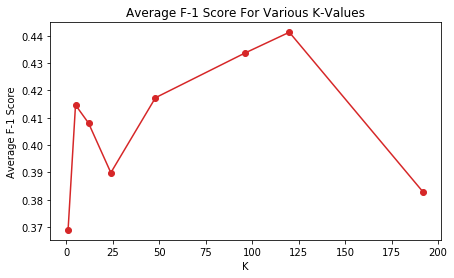

In [78]:
P3_1([1, 5, 12, 24, 48, 96, 120, 192], train_data, train_labels, dev_data, dev_labels)

For an alpha of 1e-10, the F-1 score is: 0.678
For an alpha of 0.0001, the F-1 score is: 0.664
For an alpha of 0.001, the F-1 score is: 0.66
For an alpha of 0.01, the F-1 score is: 0.641
For an alpha of 0.1, the F-1 score is: 0.61
For an alpha of 0.5, the F-1 score is: 0.551
For an alpha of 1.0, the F-1 score is: 0.521
For an alpha of 2.0, the F-1 score is: 0.48
For an alpha of 10.0, the F-1 score is: 0.249


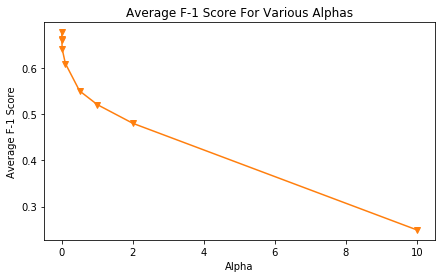

In [79]:
P3_2([1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0], train_data, train_labels, dev_data, dev_labels)

For a C of 1e-10, the F-1 score is: 0.206
The sum of the topic squared weights is: 0.0
------------------------------------------------------------------
For a C of 0.0001, the F-1 score is: 0.542
The sum of the topic squared weights is: 0.038
------------------------------------------------------------------
For a C of 0.001, the F-1 score is: 0.619
The sum of the topic squared weights is: 0.734
------------------------------------------------------------------
For a C of 0.01, the F-1 score is: 0.665
The sum of the topic squared weights is: 10.594
------------------------------------------------------------------
For a C of 0.1, the F-1 score is: 0.697
The sum of the topic squared weights is: 102.271
------------------------------------------------------------------
For a C of 0.5, the F-1 score is: 0.71
The sum of the topic squared weights is: 373.82
------------------------------------------------------------------
For a C of 1.0, the F-1 score is: 0.694
The sum of the topic square

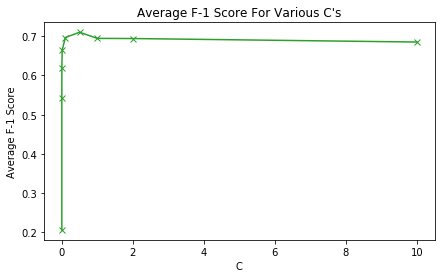

In [80]:
P3_3([1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0], train_data, train_labels, dev_data, dev_labels)

ANSWER:

1. K-nearest neighbors does not work well for this problem, because the vocabulary is very large, meaning that there are many different features and feature combinations that can potentially be clustered. Moreover, outside of the core constructs of grammar, it would be very difficult to cluster in terms of nearest-neighbors due to the sheer number of unique words and features, i.e. datapoints that would be considered outliers. A solution to this is to remove all common words. Nevertheless, 


2. Naive Bayes is a generative model that learns the joint probabilities of the features i.e. p(x,y). Logistic regression is a discriminative model that learns the conditional probability distribution i.e. p(x|y). Generative models have higher bias, but lower variance than discriminative models. High bias is indicative of model underfitting, however (meaning it fits the training and testing sets poorly). High variance is indicative of model overfitting (meaning it fits the training data well, but the testing data poorly). In Naive Bayes models, bias is caused by violation of the assumption of conditional independence of the features given a class and that provided all the assumptions are met for both models, Naive Bayes should not outperform logistic regression. In text classication tasks, like we have just performed, the fact that logistic regression is outperformed by Naive Bayes means that the high bias of this model caused by violation of the independence assumption is outweighed by the high variance of the logistic regression model when it comes to classifying text. The high variance for logistic regression is likely provided by the large number of features contained in the text corpus. Nevertheless, with more training examples (say >10,000), logistic regression might begin to outperform Bayes.


3. The C value is the inverse of regularization strength, and smaller values represent a stronger regularization. It applies a progressive penalty to parameter values that are more extreme (i.e. outliers) in order to reduce overfitting (high variance). Most often to rectify this, we utilize a function that penalizes large values that might cause the model to overfit: $\lambda \sum \theta_{j}^2$ where lambda is a constant multiplied by the sum of the squared parameter values. C is therefore $\frac{1}{\lambda}$. With higher higher lambdas, the more the extreme values will be penalized.

### Part 4:

Transform the data to a matrix of word **bigram** feature vectors.  Produce a Logistic Regression model.  For each topic, find the 5 features with the largest weights (that's 20 features in total).  Show a 20 row (features) x 4 column (topics) table of the weights.

Do you see any surprising features in this table?

Notes:
* Train on the transformed training data.
* You can use `CountVectorizer` and its `.fit_transform` method to transform data.
* You can use `LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")` to produce a Logistic Regression model.
* You can use `LogisticRegression`'s `.coef_` method to get weights for each topic.
* You can use `np.argsort` to get indices sorted by element value. 

In [81]:
def P4(training_data, training_labels, testing_data, testing_labels):
    
    # Transform raw datasets into matrices
    vec = CountVectorizer(input = 'content', binary = False, ngram_range = (2,2))
    vec_fit_train = vec.fit_transform(training_data)
    vec_fit_test = vec.transform(testing_data)
    bow = vec.get_feature_names()
    
    # Fit LR model
    LR = LogisticRegression(C = 0.5, solver="liblinear", multi_class="auto")
    LR_fit = LR.fit(vec_fit_train, training_labels)
    LR_predict = LR_fit.predict(vec_fit_test)
    coef = LR.coef_
    
    # Get the top 5 features
    top_five_array = np.argsort(coef)[:,-5:]
    
    # Create a master list of all the bigrams across all categories
    master_list = []
    bigrams = []
    for row in top_five_array:
        for index in row:
            bigrams.append(bow[index])
            for category in coef:
                master_list.append(round(category[index], 2))
    
    # Turn this into a numpy matrix
    master_array = np.stack(np.split(np.array(master_list), 20), axis = 1)
    
    # Turn this into a table 
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot()
    table = plt.table(cellText = master_array.T, rowLabels = bigrams, colLabels = newsgroups_train.target_names, loc='top')
    table.set_fontsize(15)
    table.scale(1, 3)
    plt.axis('off')
    
    return 

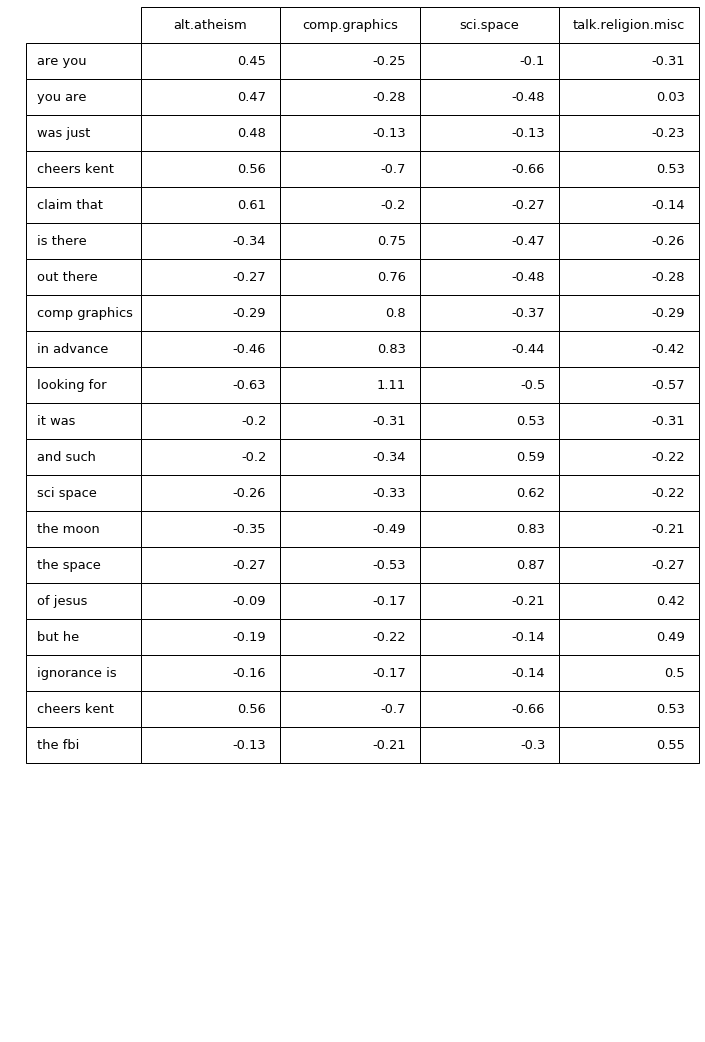

In [82]:
P4(train_data, train_labels, dev_data, dev_labels)

ANSWER: 

Surprisingly, the most common bigrams are not necessarily related to the topics of interest, and several are found across multiple cateogories. 

Some of the values in this table are also misleading if the "abs" output is used, as 1.11 is technically larger than what the largest real probability is for the bigrams in the category in question. 

### Part 5:

To improve generalization, it is common to try preprocessing text in various ways before splitting into words. For example, you could try transforming strings to lower case, replacing sequences of numbers with single tokens, removing various non-letter characters, and shortening long words.

Produce a Logistic Regression model (with no preprocessing of text).  Evaluate and show its f1 score and size of the dictionary.

Produce an improved Logistic Regression model by preprocessing the text.  Evaluate and show its f1 score and size of the vocabulary.  Try for an improvement in f1 score of at least 0.02.

How much did the improved model reduce the vocabulary size?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `CountVectorizer(preprocessor=...)` to preprocess strings with your own custom-defined function.
* `CountVectorizer` default is to preprocess strings to lower case.
* You can use `LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")` to produce a logistic regression model.
* You can use `metrics.f1_score(..., average="weighted")` to compute f1 score.
* If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular.

In [83]:
def better_preprocessor(s):
    
    # Convert to lower case
    s = s.lower()

    # Remove stop words
    tk = nltk.tokenize
    text_tokens = tk.word_tokenize(s)
    tokens_without_sw = [word for word in text_tokens if not word in ENGLISH_STOP_WORDS]
    s = (" ").join(tokens_without_sw)
    
    # Remove newlines
    s = re.sub(r'\n', ' ', s)
    
    # Replace digits 
    s = re.sub(r'\d', '@', s)

    # Remove punctuation 
    s = re.sub(r'[^A-Za-z0-9]+', ' ', s)
    
    # Replace digits 
    s = re.sub(r'\d', '@', s)
    
    # Remove words with certain endings
    s = re.sub('ing ', ' ', s)
    s = re.sub('est ', ' ', s)
    s = re.sub('ly ', ' ', s)
    s = re.sub('ion ', ' ', s)
    
    return s

def P5(training_data, training_labels, testing_data, testing_labels):
    
    # Train models with no pre-processing
    vec1 = CountVectorizer(preprocessor = None)
    vec_fit_train1 = vec1.fit_transform(training_data)
    vec_fit_dev1 = vec1.transform(testing_data)
    
    LR1 = LogisticRegression(C = 0.5, solver = "liblinear", multi_class = "auto")
    LR_fit1 = LR1.fit(vec_fit_train1, training_labels)
    LR_predict1 = LR_fit1.predict(vec_fit_dev1)
    LR1_f1 = metrics.f1_score(testing_labels, LR_predict1, average="weighted")
    
    # Train models with pre-processing
    vec = CountVectorizer(preprocessor = better_preprocessor)
    vec_fit_train = vec.fit_transform(training_data)
    vec_fit_dev = vec.transform(testing_data)
    
    LR = LogisticRegression(C = 0.5, solver = "liblinear", multi_class = "auto")
    LR_fit = LR.fit(vec_fit_train, training_labels)
    LR_predict = LR_fit.predict(vec_fit_dev)
    LR_f1 = metrics.f1_score(testing_labels, LR_predict, average="weighted")
    
    print("The non pre-processed F1 score is: {}".format(round(LR1_f1, 3)))
    print("--------------------------------------------------------------")
    print("The pre-processed F1 score is: {}".format(round(LR_f1, 3)))
    print("--------------------------------------------------------------")
    print("With pre-processing the score has improved by {}, or {}%".format(round(LR_f1-LR1_f1, 3), round(((LR_f1-LR1_f1)/LR1_f1)*100, 2)))
    
    return 

In [84]:
P5(train_data, train_labels, dev_data, dev_labels)

The non pre-processed F1 score is: 0.71
--------------------------------------------------------------
The pre-processed F1 score is: 0.732
--------------------------------------------------------------
With pre-processing the score has improved by 0.022, or 3.13%


I experimented with various pre-processing methods including tokenizing, stemming and other methods, however I found that the the included in this order of application improved the logistic regression models by the largest amount.

### Part 6:

The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. Logistic regression seeks the set of weights that minimizes errors in the training data AND has a small total size. The default L2 regularization computes this size as the sum of the squared weights (as in Part 3 above). L1 regularization computes this size as the sum of the absolute values of the weights. Whereas L2 regularization makes all the weights relatively small, L1 regularization drives many of the weights to 0, effectively removing unimportant features.

For several L1 regularization strengths ...<br/>
* Produce a Logistic Regression model using the **L1** regularization strength.  Reduce the vocabulary to only those features that have at least one non-zero weight among the four categories.  Produce a new Logistic Regression model using the reduced vocabulary and **L2** regularization strength of 0.5.  Evaluate and show the L1 regularization strength, vocabulary size, and f1 score associated with the new model.

Show a plot of f1 score vs. log vocabulary size.  Each point corresponds to a specific L1 regularization strength used to reduce the vocabulary.

How does performance of the models based on reduced vocabularies compare to that of a model based on the full vocabulary?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `LogisticRegression(..., penalty="l1")` to produce a logistic regression model using L1 regularization.
* You can use `LogisticRegression(..., penalty="l2")` to produce a logistic regression model using L2 regularization.
* You can use `LogisticRegression(..., tol=0.015)` to produce a logistic regression model using relaxed gradient descent convergence criteria.  The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.015 (the default is .0001).

In [97]:
def P6(training_data, training_labels, testing_data, testing_labels, c):
    
    # Keep this random seed here to make comparison easier.
    seed = np.random.seed(0)
    
    # Transform raw datasets into matrices
    vec = CountVectorizer()
    vec_fit_train = vec.fit_transform(training_data)
    vec_fit_test = vec.transform(testing_data)
    
    # Create some lists
    vocab_size = []
    f1_scores = []
    l2_f1_scores = []
    
    # Fit models with different C's
    for value in c:
        l1_model = LogisticRegression(solver = 'liblinear', penalty = "l1", C = value, tol = 0.015, random_state = seed)
        fitted_l1_model = l1_model.fit(vec_fit_train, training_labels)
        l1_model_predict = fitted_l1_model.predict(vec_fit_test)
        l1_model_f1 = metrics.f1_score(testing_labels, l1_model_predict, average = "weighted")
        f1_scores.append(l1_model_f1)
        vocab_size.append(np.count_nonzero(np.count_nonzero(l1_model.coef_, axis = 0)))
        
        # Get index positions of all non-zero features
        indices = np.nonzero(np.count_nonzero(l1_model.coef_, axis = 0))
        
        # Compile new vocabulary based upon previous output
        new_vocab = []
        for lis in indices:
            for index in lis:
                new_vocab.append(vec.get_feature_names()[index])
                
        # Run new LR model with l2 regularization and C = 0.5
        new_vec = CountVectorizer(vocabulary = new_vocab)
        new_vec_fit_train = new_vec.fit_transform(training_data)
        new_vec_fit_test = new_vec.transform(testing_data)
        
        l2_model = LogisticRegression(solver = 'liblinear', penalty = "l2", C = 0.5, tol = 0.015, random_state = seed)
        fitted_l2_model = l2_model.fit(new_vec_fit_train, training_labels)
        l2_model_predict = fitted_l2_model.predict(new_vec_fit_test)
        l2_model_f1 = metrics.f1_score(testing_labels, l2_model_predict, average = "weighted")
        l2_f1_scores.append(l2_model_f1)
    
    # Print out model performance info
    print("Model Performance Metrics:")
    print("------------------------------------------------------------------------------------")
    for size, f1_1, f1_2, c in zip(vocab_size, f1_scores, l2_f1_scores, c):
        print("The f1 score using with L1 regularization and a C of {} is {}".format(round(c, 1), round(f1_1, 3)))
        print("The f1 score using with L2 regularization, a C of 0.5 and vocabulary size of {} is {}".format(size, round(f1_2, 3)))
        print("------------------------------------------------------------------------------------")
    
    # Plot performance graphs 
    fig, ax1 = plt.subplots(figsize = (8,5))   
    ax1.set_title("Model f1 Score for Various Vocabulary Sizes")
    ax1.set_xlabel('log(Vocabulary Size)')
    ax1.set_ylabel('F-1 Score')
    ax1.plot(np.log(vocab_size), f1_scores, marker = 'x', color = "purple", label = "L1")
    ax1.plot(np.log(vocab_size), l2_f1_scores, marker = 'v', color = "darkgoldenrod", label = "L2")
    ax1.legend()
        
    return

Model Performance Metrics:
------------------------------------------------------------------------------------
The f1 score using with L1 regularization and a C of 0.0 is 0.428
The f1 score using with L2 regularization, a C of 0.5 and vocabulary size of 17 is 0.468
------------------------------------------------------------------------------------
The f1 score using with L1 regularization and a C of 0.1 is 0.652
The f1 score using with L2 regularization, a C of 0.5 and vocabulary size of 228 is 0.689
------------------------------------------------------------------------------------
The f1 score using with L1 regularization and a C of 0.2 is 0.693
The f1 score using with L2 regularization, a C of 0.5 and vocabulary size of 401 is 0.672
------------------------------------------------------------------------------------
The f1 score using with L1 regularization and a C of 0.3 is 0.696
The f1 score using with L2 regularization, a C of 0.5 and vocabulary size of 523 is 0.678
----------

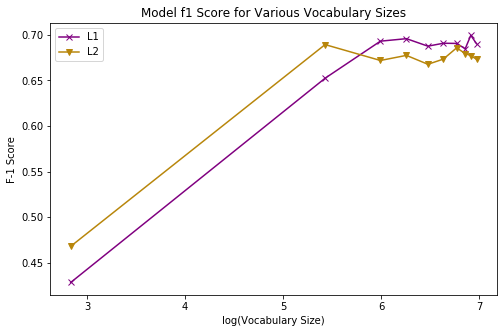

In [98]:
c = list(np.arange(0.01,1,0.1))
P6(train_data, train_labels, dev_data, dev_labels, c)

ANSWER:

Model performance is positively correlated with training vocabulary size for both types of models that we created. Nevertheless, as the models using the reduced vocabulary use l2 regularization with a fixed C-value, while the models using the full vocabulary use a variable C value and l1 regularization with a changing C-value it might be difficult to make accurate comparisons between the two. We can see from the graph above, however, that the l2 model with reduced vocabulary generally outperforms the l1 model with the full vocabulary, up to a certain point, where the l1 model then overtakes the l2 model in terms of performance. Nevertheless, performance for both plateaus after about log(5) vocabulary size. Lasso (l2) shrinks the less important (i.e. outlier) coefficients independently, while ridge (l1) shrinks outliers unevenly to 0. It would appear that after a certain vocabulary size, the colinearity of variables begins to impact the l2 model, thus allowing it to be outperformed by the l1 model. 

### Part 7:

How is `TfidfVectorizer` different than `CountVectorizer`?

Produce a Logistic Regression model based on data represented in tf-idf form, with L2 regularization strength of 100.  Evaluate and show the f1 score.  How is `TfidfVectorizer` different than `CountVectorizer`?

Show the 3 documents with highest R ratio, where ...<br/>
$R\,ratio = maximum\,predicted\,probability \div predicted\,probability\,of\,correct\,label$

Explain what the R ratio describes.  What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

Note:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `TfidfVectorizer` and its `.fit_transform` method to transform data to tf-idf form.
* You can use `LogisticRegression(C=100, solver="liblinear", multi_class="auto")` to produce a logistic regression model.
* You can use `LogisticRegression`'s `.predict_proba` method to access predicted probabilities.

In [47]:
def P7(train_data, train_labels, test_data, test_labels):
    
    # Fit tfidf vectorizer
    tfidf = TfidfVectorizer()
    tfidf_fit_train = tfidf.fit_transform(train_data)
    tfidf_fit_test = tfidf.transform(test_data)
    
    # Fit count vectorizer
    cv = CountVectorizer()
    cv_fit_train = cv.fit_transform(train_data)
    cv_fit_test = cv.transform(test_data)
    
    # Train LR using tfidf
    LR1 = LogisticRegression(C = 100, solver = "liblinear", multi_class = "auto")
    LR1_fit = LR1.fit(tfidf_fit_train, train_labels)
    LR1_predict = LR1.predict(tfidf_fit_test)
    LR1_f1 = metrics.f1_score(test_labels, LR1_predict, average = "weighted")
    
    # Train LR using standard countvectorizer
    LR2 = LogisticRegression(C = 100, solver = "liblinear", multi_class = "auto")
    LR2_fit = LR2.fit(cv_fit_train, train_labels)
    LR2_predict = LR2.predict(cv_fit_test)
    LR2_f1 = metrics.f1_score(test_labels, LR2_predict, average = "weighted")
    
    # Calculate top 3 probabilities
    LR1_pred = LR1.predict_proba(tfidf_fit_test)
    
    position_list = []
    for row in LR1_pred:
        position_list.append(np.argmax(row))
        
    ratio_list = []
    for index, label in enumerate(position_list):
        if label == test_labels[index]:
            ratio_list.append(np.max(LR1_pred[index])/LR1_pred[index][label])
        else:
            ratio_list.append(np.max(LR1_pred[index]/LR1_pred[index][test_labels[index]]))
            
    indices = list((-np.array(ratio_list)).argsort()[:3])
    
    # Print 
    print("Comparison of Model Performance")
    print("---------------------------------------------------------------------------------------------------")
    print("The f1 score of the logistic regression model using the Tfidf vectorized training dataset is: {}".format(round(LR1_f1, 3)))
    print("The f1 score of the logistic regression model using the count vectorized training dataset is: {}".format(round(LR2_f1, 3)))
    print("---------------------------------------------------------------------------------------------------")
    print("")
    print("")
    print("Documents with the 3 Largest R-Ratios")
    print("")
    for index, value in enumerate(indices):
        print("Example {}".format(index + 1))
        print("---------------------------------------------------------------------------------------------------")
        print("The predicted label: {}".format(newsgroups_train.target_names[position_list[value]]))
        print("The real label: {}".format(newsgroups_train.target_names[test_labels[value]]))
        print("The R-ratio: {}".format(round(ratio_list[value], 3)))
        print("---------------------------------------------------------------------------------------------------")
        print("The message:")
        print(test_data[value])
        print("")
        
    return 

In [48]:
P7(train_data, train_labels, dev_data, dev_labels)

Comparison of Model Performance
---------------------------------------------------------------------------------------------------
The f1 score of the logistic regression model using the Tfidf vectorized training dataset is: 0.76
The f1 score of the logistic regression model using the count vectorized training dataset is: 0.68
---------------------------------------------------------------------------------------------------


Documents with the 3 Largest R-Ratios

Example 1
---------------------------------------------------------------------------------------------------
The predicted label: comp.graphics
The real label: talk.religion.misc
The R-ratio: 929.358
---------------------------------------------------------------------------------------------------
The message:
I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In add

ANSWER:

The R-ratio may be thought of as a magnitude score of how wrong the model was in predicting the class of the message. The numerator of the R-ratio is the maximum predicted probability, corresponding to the index position of the predicted class. The denominator corresponds to the true label probability. The lower the true label's probability, the "worse" the model performed for that particular data point and consequently the R-ratio will be larger due to the differences between the numerators and denominators. 

Interestingly the example which the model performed worst on - i.e. the one with the highest R-ratio is a message belonging to the religion label, but which actually has many computer and computer-graphics related words in it. This is likely why the model predicted the wrong label. Similarly for the second worst performing example, it was another religion example, but with words like "ftp", "online" and "internet", demonstrating how the model might mistake it for belonging to computer graphics. Finally, the 3rd worst performing example is a little more different without any particular key words belonging to either category. 

A potential way to address this would be to try and identify words that seem to be common in the language and thus across categories (but not strictly categorized as "stop words" per se) - e.g. "internet", "e-mail" etc and remove these from the vocabulary, we can potentially modify the preprocessor for this.

### Part 8 EXTRA CREDIT:

Produce a Logistic Regression model to implement your suggestion from Part 7.

In [158]:
def better_better_preprocessor(s):

    # Convert to lower case
    s = s.lower()

    # Remove stop words
    tk = nltk.tokenize
    text_tokens = tk.word_tokenize(s)
    tokens_without_sw = [word for word in text_tokens if not word in ENGLISH_STOP_WORDS]
    s = (" ").join(tokens_without_sw)
    
    # Remove some generic words like 'email', 'internet' etc.
    remove_list = ['e-mail', 'email', 'internet', 'ftp', 'ascii', 'latex', '.edu', '.com']
    remove = '|'.join(remove_list)
    
    s = re.sub(remove, ' ', s)
    
    # Remove newlines
    s = re.sub(r'\n', ' ', s)
    
    # Replace digits 
    s = re.sub(r'\d', '@', s)

    # Remove punctuation 
    s = re.sub(r'[^A-Za-z0-9]+', ' ', s)
    
    # Replace digits 
    s = re.sub(r'\d', '@', s)
    
    # Remove words with certain endings
    s = re.sub('ing ', ' ', s)
    s = re.sub('est ', ' ', s)
    s = re.sub('ly ', ' ', s)
    s = re.sub('ion ', ' ', s)
    
    return s

In [159]:
def P8(train_data, train_labels, test_data, test_labels):
    
    # Fit tfidf vectorizer
    tfidf = TfidfVectorizer(preprocessor=better_better_preprocessor)
    tfidf_fit_train = tfidf.fit_transform(train_data)
    tfidf_fit_test = tfidf.transform(test_data)
    
    # Fit count vectorizer
    cv = CountVectorizer(preprocessor=better_better_preprocessor)
    cv_fit_train = cv.fit_transform(train_data)
    cv_fit_test = cv.transform(test_data)
    
    # Train LR using tfidf
    LR1 = LogisticRegression(C = 100, solver = "liblinear", multi_class = "auto")
    LR1_fit = LR1.fit(tfidf_fit_train, train_labels)
    LR1_predict = LR1.predict(tfidf_fit_test)
    LR1_f1 = metrics.f1_score(test_labels, LR1_predict, average = "weighted")
    
    # Train LR using standard countvectorizer
    LR2 = LogisticRegression(C = 100, solver = "liblinear", multi_class = "auto")
    LR2_fit = LR2.fit(cv_fit_train, train_labels)
    LR2_predict = LR2.predict(cv_fit_test)
    LR2_f1 = metrics.f1_score(test_labels, LR2_predict, average = "weighted")
    
    # Calculate top 3 probabilities
    LR1_pred = LR1.predict_proba(tfidf_fit_test)
    
    position_list = []
    for row in LR1_pred:
        position_list.append(np.argmax(row))
        
    ratio_list = []
    for index, label in enumerate(position_list):
        if label == test_labels[index]:
            ratio_list.append(np.max(LR1_pred[index])/LR1_pred[index][label])
        else:
            ratio_list.append(np.max(LR1_pred[index]/LR1_pred[index][test_labels[index]]))
            
    indices = list((-np.array(ratio_list)).argsort()[:3])
    
    # Print 
    print("Comparison of Model Performance")
    print("---------------------------------------------------------------------------------------------------")
    print("The f1 score of the logistic regression model using the Tfidf vectorized training dataset is: {}".format(round(LR1_f1, 3)))
    print("The f1 score of the logistic regression model using the count vectorized training dataset is: {}".format(round(LR2_f1, 3)))
    print("---------------------------------------------------------------------------------------------------")
    print("")
    print("")
    print("Documents with the 3 Largest R-Ratios")
    print("")
    for index, value in enumerate(indices):
        print("Example {}".format(index + 1))
        print("---------------------------------------------------------------------------------------------------")
        print("The predicted label: {}".format(newsgroups_train.target_names[position_list[value]]))
        print("The real label: {}".format(newsgroups_train.target_names[test_labels[value]]))
        print("The R-ratio: {}".format(round(ratio_list[value], 3)))
        print("---------------------------------------------------------------------------------------------------")
        print("The message:")
        print(test_data[value])
        print("")
        
    return 

In [160]:
P8(train_data, train_labels, dev_data, dev_labels)

Comparison of Model Performance
---------------------------------------------------------------------------------------------------
The f1 score of the logistic regression model using the Tfidf vectorized training dataset is: 0.766
The f1 score of the logistic regression model using the count vectorized training dataset is: 0.685
---------------------------------------------------------------------------------------------------


Documents with the 3 Largest R-Ratios

Example 1
---------------------------------------------------------------------------------------------------
The predicted label: comp.graphics
The real label: talk.religion.misc
The R-ratio: 1143.613
---------------------------------------------------------------------------------------------------
The message:
I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In 

ANSWER:

As we can see here the performance of the two models has improved marginally by utilizing a preprocessor for both the vectorizers. Nevertheless, the first two examples are still wrong - with the model performing even worse on the first one, but better on the second. Example 3 is an entirely new one. As there second two examples are rleated to atheism and religion it seems that there are common keywords here that would require identification and removal (this makes sense as the two topics are very related).